In [11]:
package DetectionProcesses {
    action def Detect { out detectionSignal; }
    action def Process { in signal; out processedData; }
    action def Transmit { in data; }

    action detectSubmarine {
        action useSonar: Detect[1];
        action useRadar: Detect[1];
        flow useSonar.detectionSignal to processData.signal;
        flow useRadar.detectionSignal to processData.signal;
        action processData: Process[1];
        flow processData.processedData to transmitData.data;
        action transmitData: Transmit[1];
    }
    action processData {
        action analyze: Process[1];
    }
    // Additional actions and flows can be defined here
}

Package DetectionProcesses (4a4b616d-13cb-4d14-a146-7fc5650f88c0)


In [14]:
package SubmarineDetectionSystem {
    import DetectionProcesses::*;

    part def Sensors {
        perform action detectSubmarine[*] :> DetectionProcesses::detectSubmarine;

        part sonarSubsystem {
            perform detectSubmarine.useSonar;
        }

        part radarSubsystem {
            perform detectSubmarine.useRadar;
        }
    }

    part def DataProcessingUnit {
        perform action processData[*] :> DetectionProcesses::processData;

        part analysisSubsystem {
            perform processData.analyze;
        }

    }

    part def CommunicationSystem {
        perform action transmitData[*] :> DetectionProcesses::processData;
    }

    part def PowerSupply {
        // Power supply specific actions and interactions
    }

    part def UserInterface {
        // User interface specific actions and interactions
    }

}


Package SubmarineDetectionSystem (435d7b40-7b2b-4d33-87bc-6715d0c3d78d)


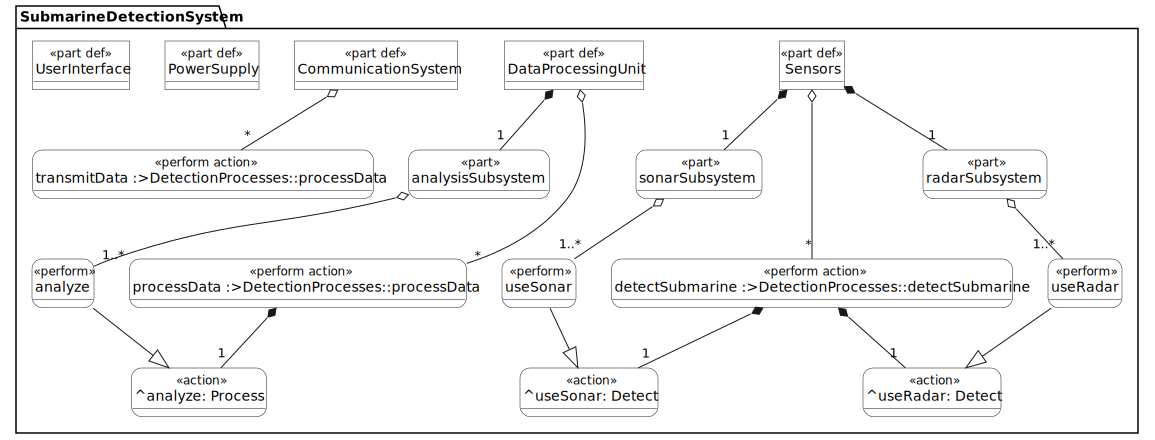

In [17]:
%viz --view=tree  SubmarineDetectionSystem